In [26]:
# %% [markdown]
# ÍµêÌÜµÏÇ¨Í≥† Îç∞Ïù¥ÌÑ∞ EDA Î∂ÑÏÑù ÎÖ∏Ìä∏Î∂Å

# %% [code]
# Í∏∞Î≥∏ ÏÑ§Ï†ï (Ìè∞Ìä∏, Í≤ΩÍ≥† Ï†úÍ±∞ Îì±)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import os
import warnings
from matplotlib import font_manager

warnings.filterwarnings("ignore", category=UserWarning)

font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False
sns.set(style="whitegrid", font=font_prop.get_name())

In [27]:
# %% [code]
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
path = os.getcwd()
df1 = pd.read_csv(os.path.join(path, 'TAAS_ÏÇ¨Í≥†Î∂ÑÏÑù.csv'), encoding='utf-8')
df2 = pd.read_csv(os.path.join(path, 'TAAS_ÏúµÌï©Î∂ÑÏÑù.csv'), encoding='utf-8')

# Ï∂úÏ≤ò Ïª¨Îüº Ï∂îÍ∞Ä Î∞è Î≥ëÌï©
df1['source'] = 'ÏÇ¨Í≥†Î∂ÑÏÑù'
df2['source'] = 'ÏúµÌï©Î∂ÑÏÑù'
df = pd.concat([df1, df2], ignore_index=True)
print(f"Ï†ÑÏ≤¥ Ìñâ Í∞úÏàò: {len(df):,}")

# %% [code]
# ÏúÑÌóòÎèÑ ÌÜµÌï© ÏßÄÌëú Í≥ÑÏÇ∞
for col in ['ÏÇ¨ÎßùÏûêÏàò', 'Ï§ëÏÉÅÏûêÏàò', 'Í≤ΩÏÉÅÏûêÏàò']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

df['incident_score'] = 1.0 + 0.7 * (df['Ï§ëÏÉÅÏûêÏàò'] > 0) + 0.3 * (df['Í≤ΩÏÉÅÏûêÏàò'] > 0)
df['severity_score'] = df['ÏÇ¨ÎßùÏûêÏàò'] + df['Ï§ëÏÉÅÏûêÏàò'] * 0.7 + df['Í≤ΩÏÉÅÏûêÏàò'] * 0.3
df['total_risk'] = df['incident_score'] * 0.4 + df['severity_score'] * 0.6

# %% [code]
# ÏàòÏπòÌòï Î≥ÄÏàò Ï†ïÏùò
num_cols = ['ÏÇ¨ÎßùÏûêÏàò', 'Ï§ëÏÉÅÏûêÏàò', 'Í≤ΩÏÉÅÏûêÏàò', 'Î∂ÄÏÉÅÏã†Í≥†ÏûêÏàò',
            'incident_score', 'severity_score', 'total_risk']

Ï†ÑÏ≤¥ Ìñâ Í∞úÏàò: 3,136,776


In [ ]:
# # %% [code]
# # ÏàòÏπòÌòï Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
# plt.figure(figsize=(10, 8))
# sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("ÏàòÏπòÌòï Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontproperties=font_prop, fontsize=14)
# plt.xticks(fontproperties=font_prop)
# plt.yticks(fontproperties=font_prop)
# plt.tight_layout()
# plt.show()

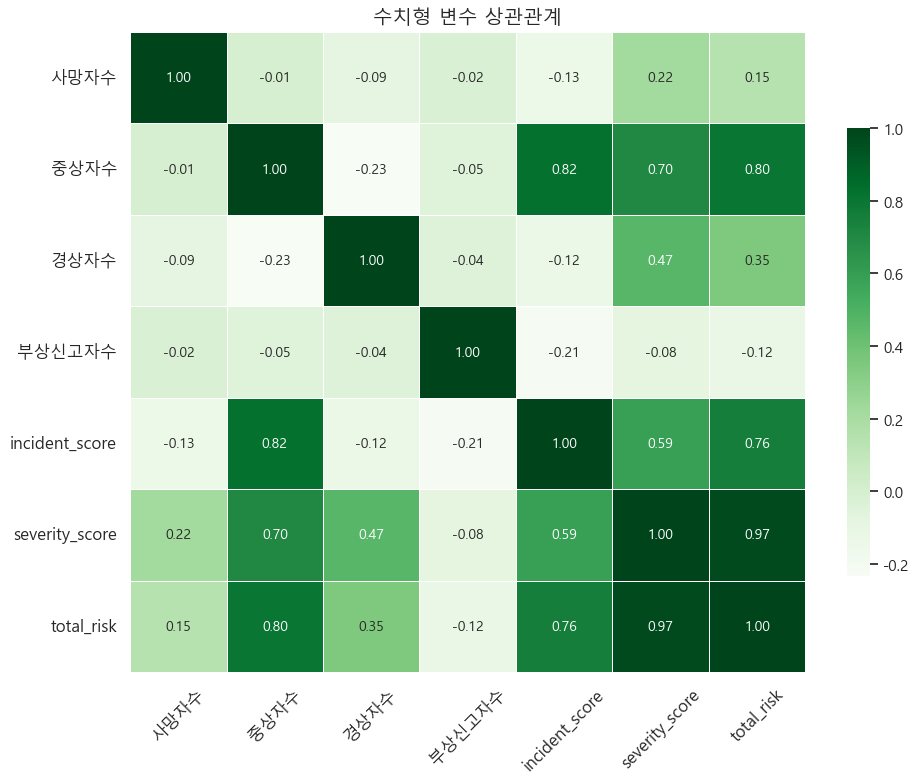

In [38]:
# %% [code]
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[num_cols].corr(), 
    annot=True, 
    fmt=".2f", 
    cmap='Greens',        # Îçî ÍπîÎÅîÌïú ÏÉâÏÉÅ
    linewidths=0.5,       # ÏÖÄ Í≤ΩÍ≥ÑÏÑ†
    linecolor='white',    # Í≤ΩÍ≥ÑÏÑ† ÏÉâÏÉÅ
    cbar_kws={'shrink': 0.7},  # colorbar ÏÇ¨Ïù¥Ï¶à Ï°∞Ï†ï
    annot_kws={"size": 10}     # Í∏ÄÏûê ÌÅ¨Í∏∞
)
plt.title("ÏàòÏπòÌòï Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontproperties=font_prop, fontsize=14)
plt.xticks(fontproperties=font_prop, rotation=45)
plt.yticks(fontproperties=font_prop)
plt.tight_layout()
plt.show()


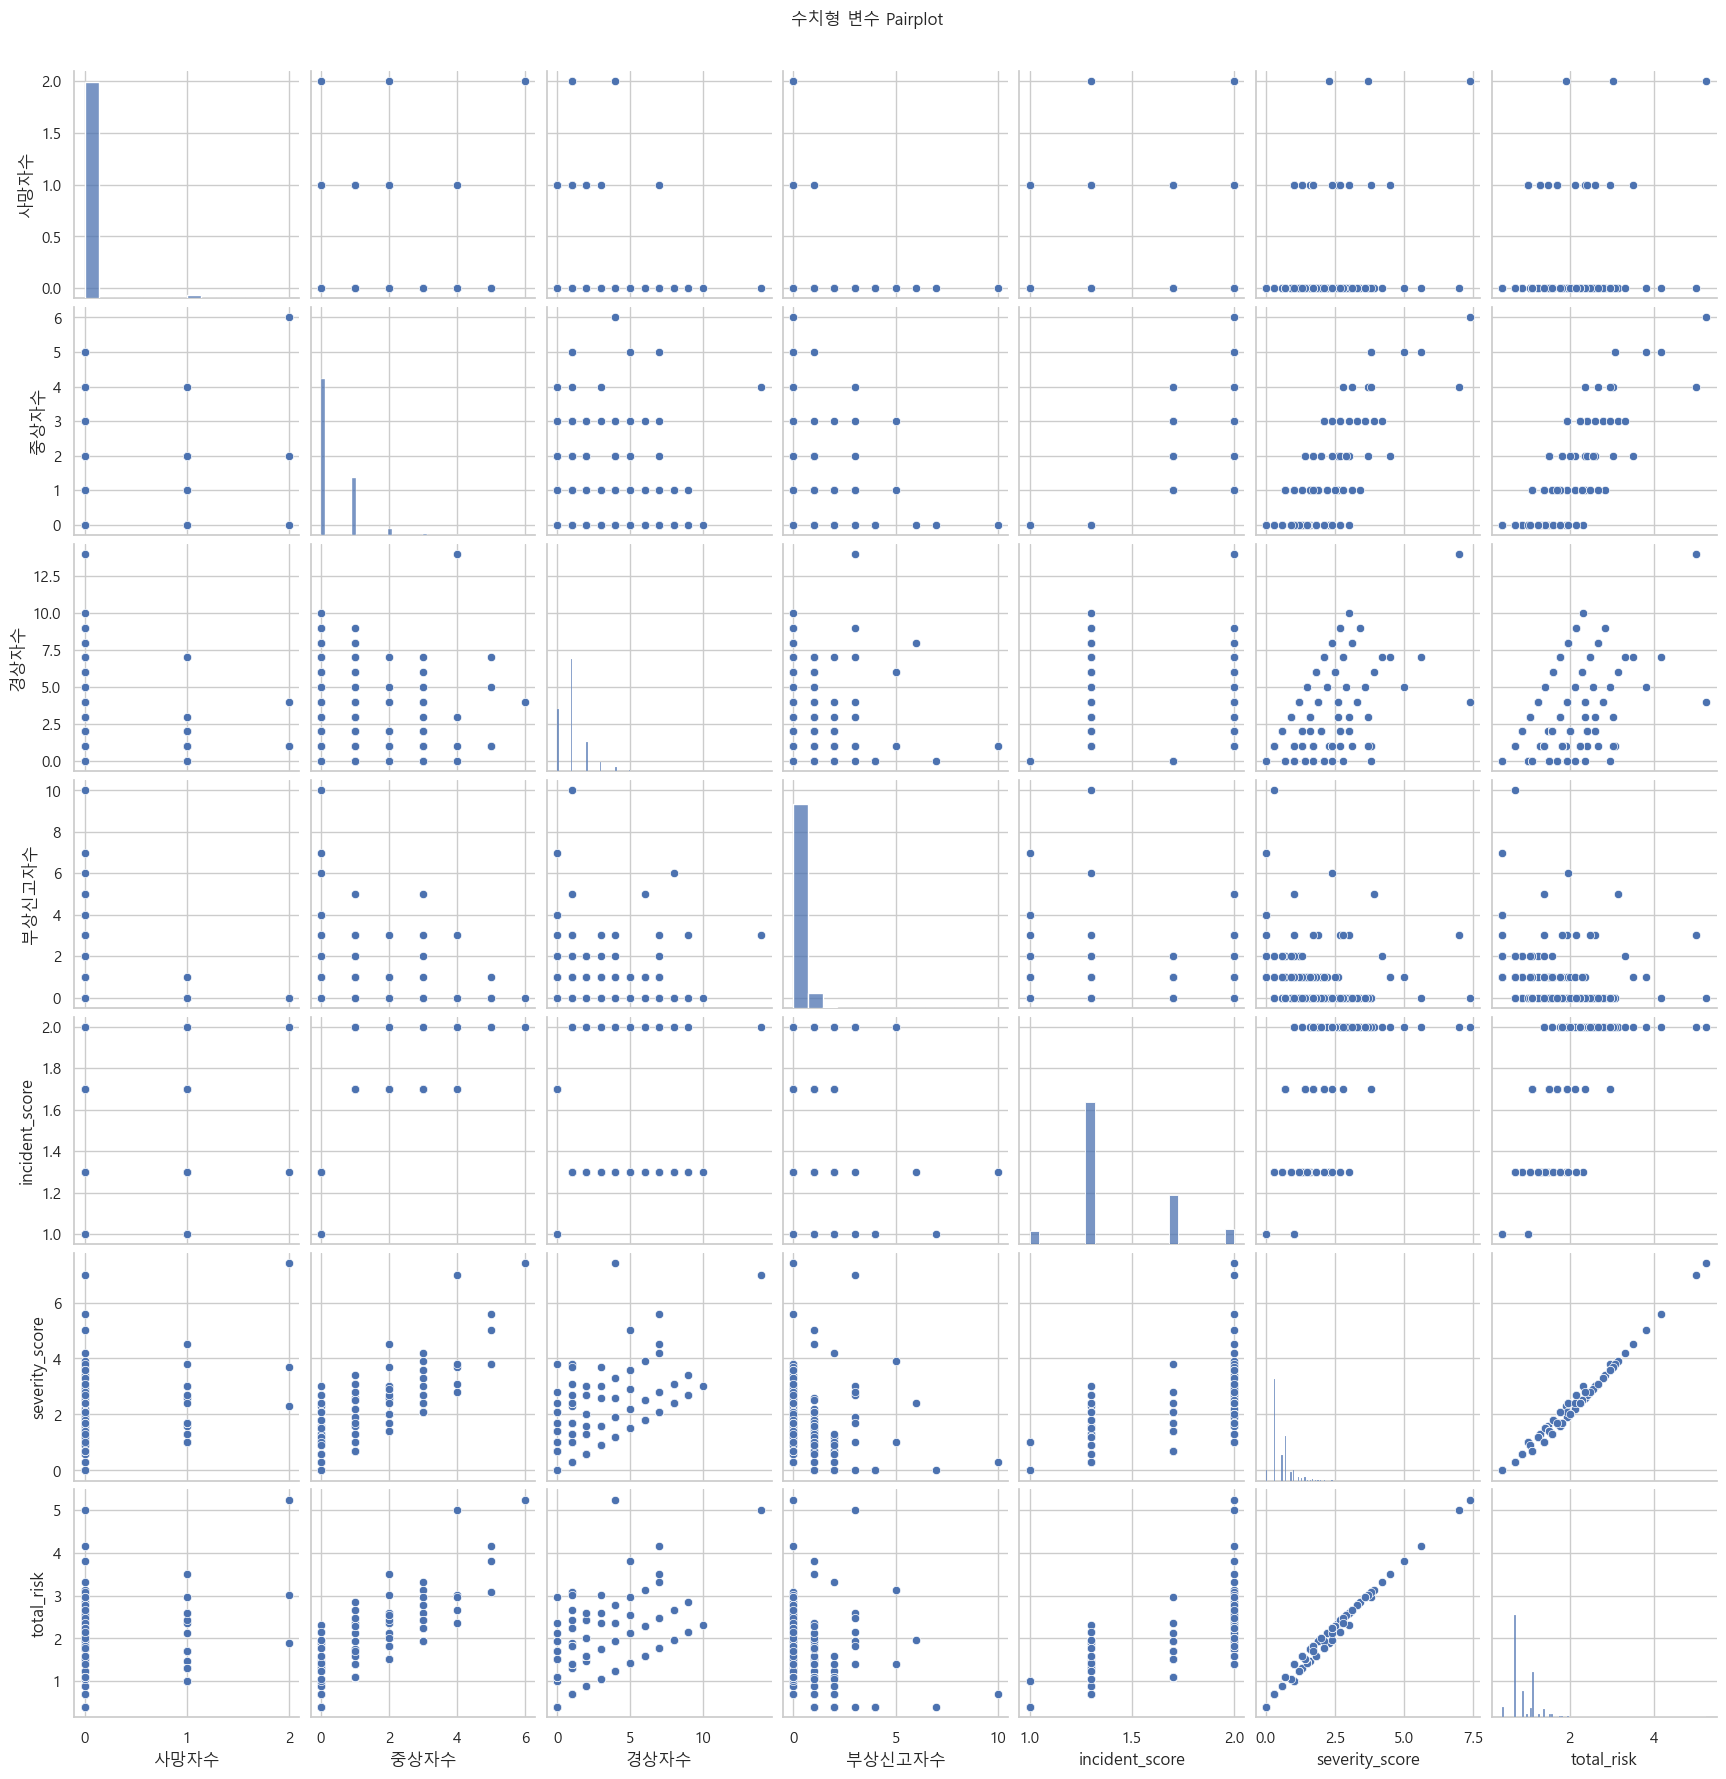

In [29]:
# %% [code]
# ÏàòÏπòÌòï Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî (Pairplot)
# - Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎÇò Ìå®ÌÑ¥ ÌôïÏù∏Ïóê Ïú†Ïö©
# - ÏÇ∞Ï†êÎèÑ, ÌûàÏä§ÌÜ†Í∑∏Îû®, Î∂ÑÌè¨ Î∞ÄÎèÑ Îì±ÏùÑ ÌïúÎààÏóê ÎπÑÍµê Í∞ÄÎä•
# - Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏúºÎ©¥ Î†åÎçîÎßÅ ÎäêÎ†§ÏßÄÎØÄÎ°ú ÏµúÎåÄ 5,000Í±¥ ÏÉòÌîåÎßÅ

sample = df.sample(5000, random_state=42) if len(df) > 5000 else df

# pairplot Í∑∏Î¶¨Í∏∞
sns.pairplot(sample[num_cols])  # num_cols: ÏàòÏπòÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏ (ÏÇ¨ÎßùÏûêÏàò, Ï§ëÏÉÅÏûêÏàò Îì±)
plt.suptitle("ÏàòÏπòÌòï Î≥ÄÏàò Pairplot", y=1.02, fontproperties=font_prop)  # Ï†ÑÏ≤¥ Ï†úÎ™©
plt.show()


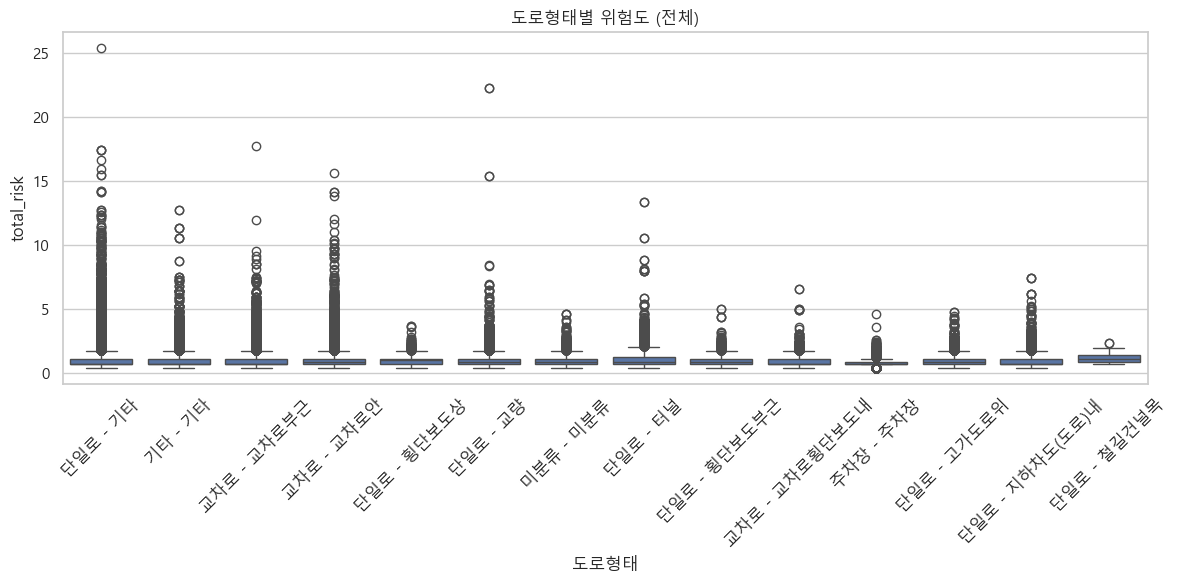

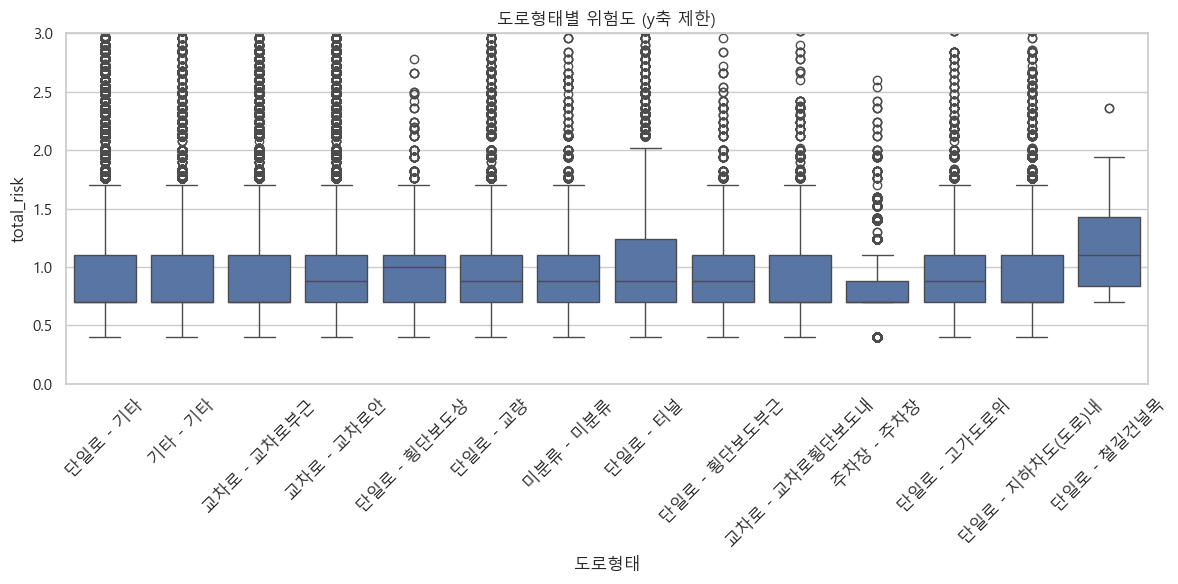

In [30]:
# %% [code]
# ÎèÑÎ°úÌòïÌÉúÎ≥Ñ total_risk Î∞ïÏä§ÌîåÎ°Ø - ÏõêÎ≥∏
if 'ÎèÑÎ°úÌòïÌÉú' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='ÎèÑÎ°úÌòïÌÉú', y='total_risk')
    plt.title("ÎèÑÎ°úÌòïÌÉúÎ≥Ñ ÏúÑÌóòÎèÑ (Ï†ÑÏ≤¥)", fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.tight_layout()
    plt.show()

# %% [code]
# ÎèÑÎ°úÌòïÌÉúÎ≥Ñ total_risk Î∞ïÏä§ÌîåÎ°Ø - yÏ∂ï ÏÉÅÌïú Ï†úÌïú (ex: 3.0)
if 'ÎèÑÎ°úÌòïÌÉú' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='ÎèÑÎ°úÌòïÌÉú', y='total_risk')
    plt.ylim(0, 3.0)  # yÏ∂ï Ï†úÌïú ÏÑ§Ï†ï
    plt.title("ÎèÑÎ°úÌòïÌÉúÎ≥Ñ ÏúÑÌóòÎèÑ (yÏ∂ï Ï†úÌïú)", fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.tight_layout()
    plt.show()


In [ ]:
# ### Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏúºÎ©¥ ÏïÑÎûò ÏãúÍ∞ÅÌôî ÏΩîÎìú Ïã§Ìñâ

# # %% [code]
# # ÌÜµÌñâÎüâ vs ÏÇ¨Í≥†Í±¥Ïàò ÏÇ∞Ï†êÎèÑ
# if {'ÌÜµÌñâÎüâ', 'ÏÇ¨Í≥†Í±¥Ïàò'}.issubset(df.columns):
#     df['ÌÜµÌñâÎüâ'] = pd.to_numeric(df['ÌÜµÌñâÎüâ'], errors='coerce')
#     df['ÏÇ¨Í≥†Í±¥Ïàò'] = pd.to_numeric(df['ÏÇ¨Í≥†Í±¥Ïàò'], errors='coerce')
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(data=df, x='ÌÜµÌñâÎüâ', y='ÏÇ¨Í≥†Í±¥Ïàò', hue='ÎèÑÎ°úÌòïÌÉú' if 'ÎèÑÎ°úÌòïÌÉú' in df.columns else None, alpha=0.6)
#     plt.title("ÌÜµÌñâÎüâ vs ÏÇ¨Í≥†Í±¥Ïàò", fontproperties=font_prop)
#     plt.tight_layout()
#     plt.show()

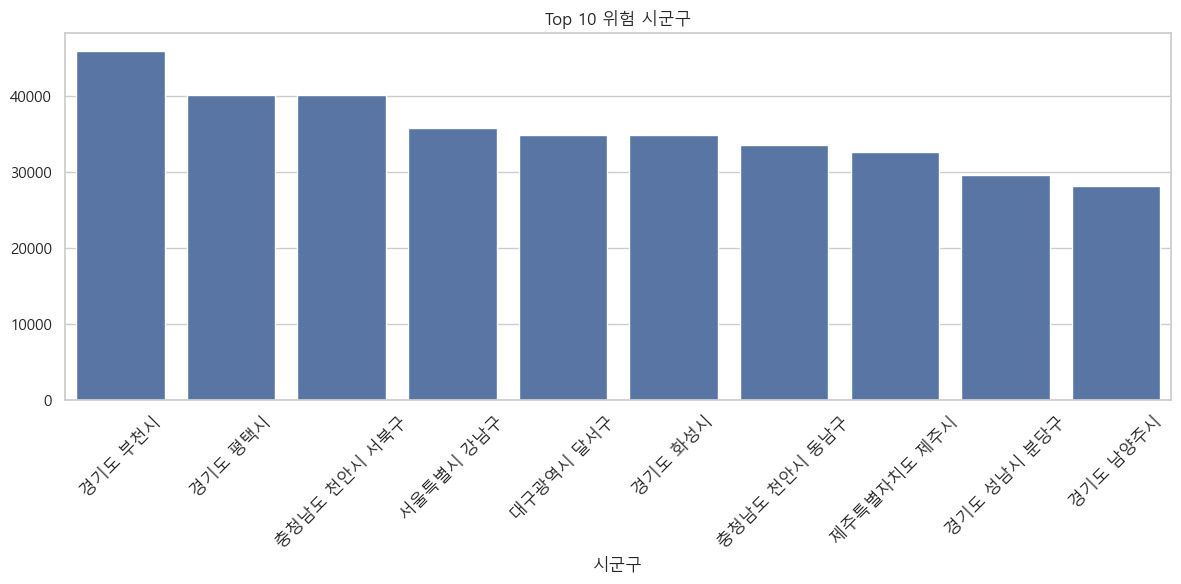

In [32]:
# %% [code]
# ÏãúÍµ∞Íµ¨Î≥Ñ total_risk Ìï©Í≥Ñ ÏÉÅÏúÑ 10Í∞ú Î∞îÌîåÎ°Ø
if 'ÏãúÍµ∞Íµ¨' in df.columns:
    top10 = df.groupby('ÏãúÍµ∞Íµ¨')['total_risk'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top10.index, y=top10.values)
    plt.title("Top 10 ÏúÑÌóò ÏãúÍµ∞Íµ¨", fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.tight_layout()
    plt.show()

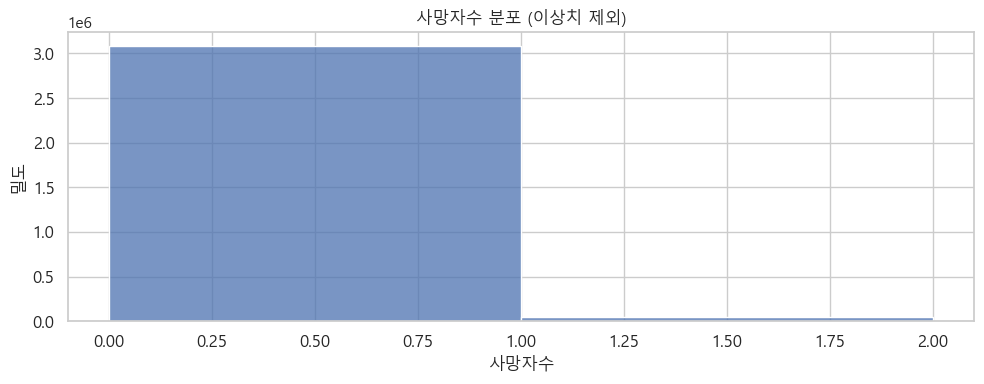

ÏÇ¨ÎßùÏûêÏàò


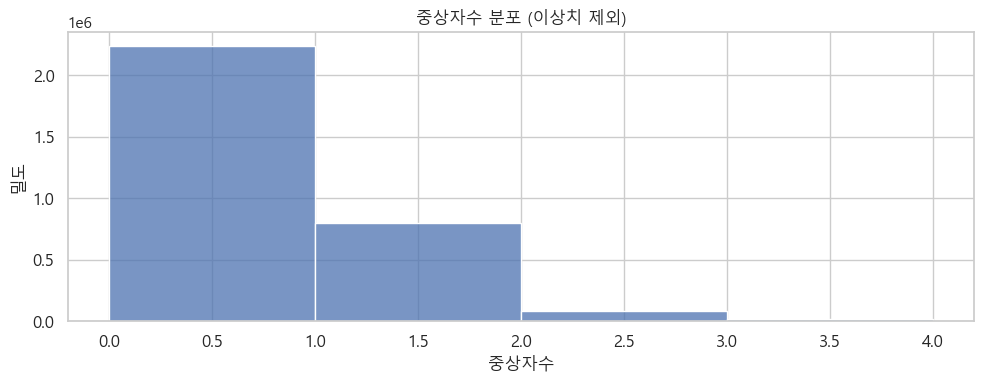

Ï§ëÏÉÅÏûêÏàò


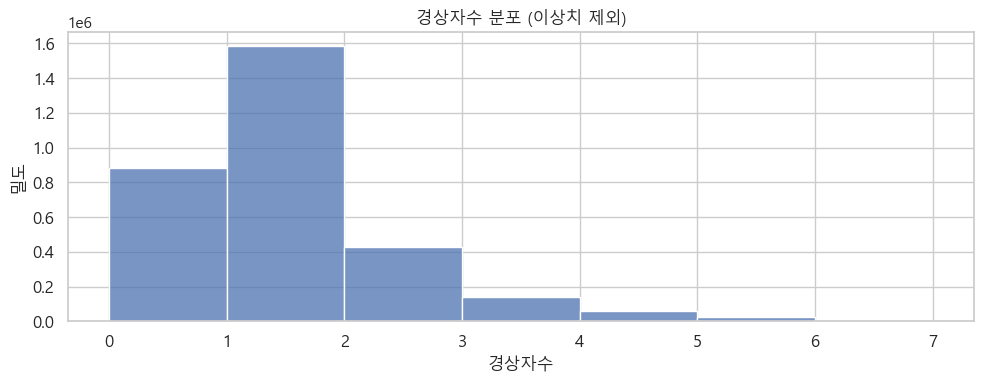

Í≤ΩÏÉÅÏûêÏàò


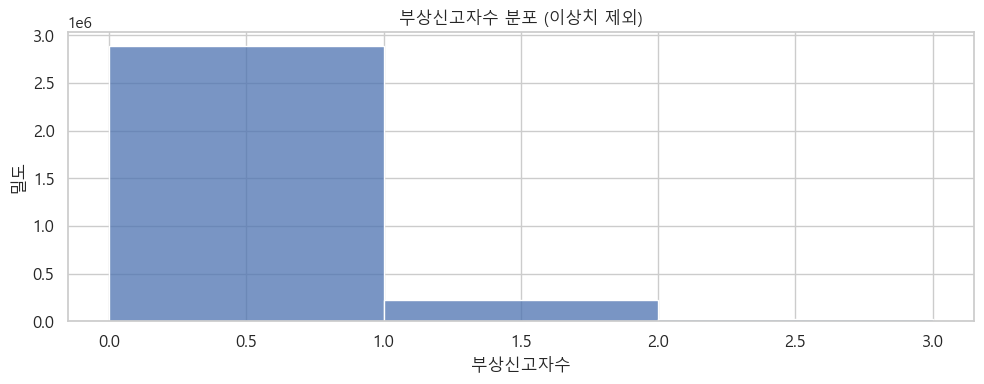

Î∂ÄÏÉÅÏã†Í≥†ÏûêÏàò


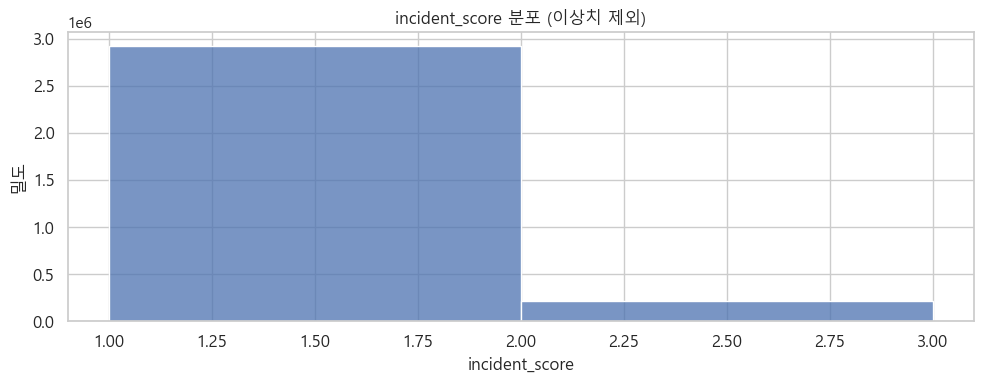

incident_score: ÏÇ¨Í≥† Î∞úÏÉù ÏûêÏ≤¥Ïóê ÎåÄÌïú Îã®Ïàú Ï†êÏàò.


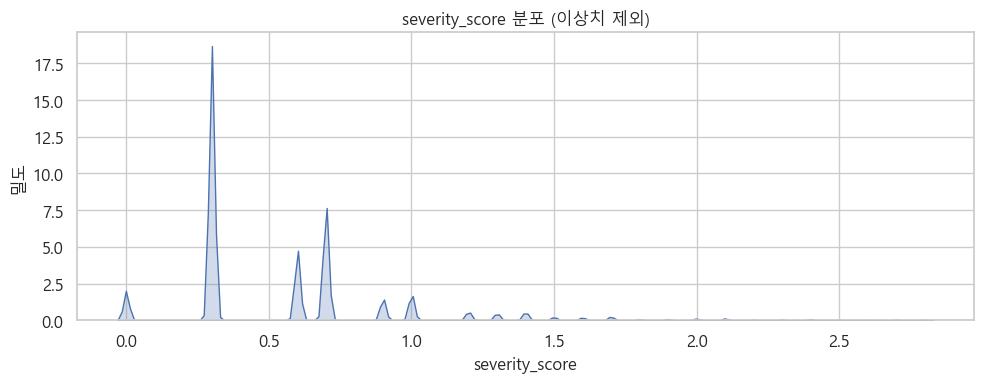

severity_score: ÏÇ¨ÎßùÏûê Î∞è Ï§ëÏÉÅÏûê ÏàòÏóê Í∏∞Î∞òÌïú Ïã¨Í∞ÅÎèÑ ÏßÄÌëú. ÏπòÎ™ÖÎèÑ ÎÜíÏùÄ ÏÇ¨Í≥†ÏóêÏÑú ÎÜíÍ≤å ÎÇòÌÉÄÎÇ®.


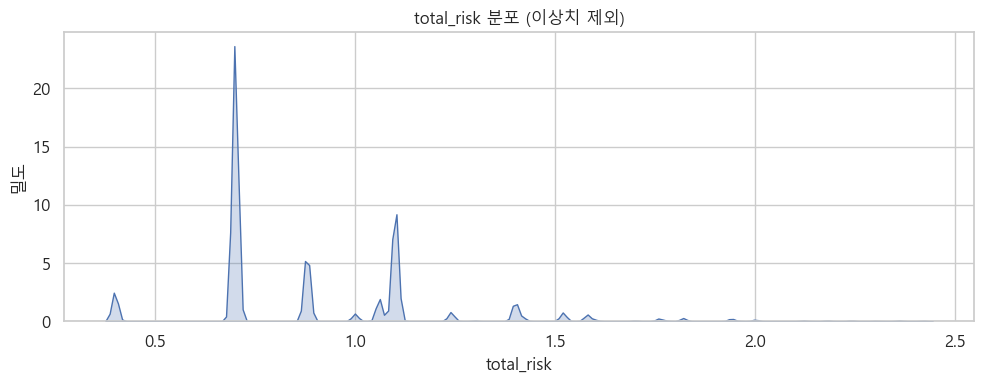

total_risk: ÌÜµÌï© ÏúÑÌóòÎèÑ ÏßÄÌëú. ÏÇ¨Í≥†Ïùò Ïã¨Í∞ÅÏÑ±Í≥º ÎπàÎèÑÎ•º Ìï®Íªò Í≥†Î†§. ÎÜíÏùÄ Í∞íÏùÄ Ï§ëÎåÄÏÇ¨Í≥† Í∞ÄÎä•ÏÑ±.


In [33]:
# %% [code]
# ÏàòÏπòÌòï Î≥ÄÏàòÏùò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî (KDE ÎòêÎäî Histogram)
# - Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ Î∂ÑÌè¨ ÌôïÏù∏
# - Î≥ÄÏàò ÌäπÏÑ±Ïóê Îî∞Îùº histplot ÎòêÎäî kdeplot ÏûêÎèô ÏÑ†ÌÉù
# - Ìï¥ÏÑù Ï£ºÏÑù Ï∂úÎ†• Ìè¨Ìï®

for col in num_cols:
    try:
        # ÏàòÏπòÌòï Î≥ÄÌôò Î∞è Í≤∞Ï∏° Ï†úÍ±∞
        series = pd.to_numeric(df[col], errors='coerce').dropna()
        if len(series) == 0:
            continue

        # Ïù¥ÏÉÅÏπò Ï†úÍ±∞ (ÌïòÏúÑ 0.1%, ÏÉÅÏúÑ 99.5%)
        q_low, q_high = series.quantile([0.001, 0.995])
        series = series[(series >= q_low) & (series <= q_high)]

        # ÏãúÍ∞ÅÌôî ÏãúÏûë
        plt.figure(figsize=(10, 4))

        # Ïù¥ÏÇ∞Ìòï Î≥ÄÏàò ÎòêÎäî Í≥†Ïú†Í∞í Ï†ÅÏùÄ Í≤ΩÏö∞: histplot
        if series.nunique() < 10 or col in ['incident_score', 'ÏÇ¨ÎßùÏûêÏàò', 'Ï§ëÏÉÅÏûêÏàò']:
            sns.histplot(series, bins=range(int(series.min()), int(series.max()) + 2), kde=False)
        else:
            sns.kdeplot(series, fill=True, bw_adjust=0.5)

        plt.title(f"{col} Î∂ÑÌè¨ (Ïù¥ÏÉÅÏπò Ï†úÏô∏)", fontproperties=font_prop)
        plt.xlabel(col, fontproperties=font_prop)
        plt.ylabel("Î∞ÄÎèÑ", fontproperties=font_prop)
        plt.xticks(fontproperties=font_prop)
        plt.yticks(fontproperties=font_prop)
        plt.tight_layout()
        plt.show()

        # Î≥ÄÏàòÎ≥Ñ Ìï¥ÏÑù Ï∂úÎ†•
        if col == "total_risk":
            print("total_risk: ÌÜµÌï© ÏúÑÌóòÎèÑ ÏßÄÌëú. ÏÇ¨Í≥†Ïùò Ïã¨Í∞ÅÏÑ±Í≥º ÎπàÎèÑÎ•º Ìï®Íªò Í≥†Î†§. ÎÜíÏùÄ Í∞íÏùÄ Ï§ëÎåÄÏÇ¨Í≥† Í∞ÄÎä•ÏÑ±.")
        elif col == "severity_score":
            print("severity_score: ÏÇ¨ÎßùÏûê Î∞è Ï§ëÏÉÅÏûê ÏàòÏóê Í∏∞Î∞òÌïú Ïã¨Í∞ÅÎèÑ ÏßÄÌëú. ÏπòÎ™ÖÎèÑ ÎÜíÏùÄ ÏÇ¨Í≥†ÏóêÏÑú ÎÜíÍ≤å ÎÇòÌÉÄÎÇ®.")
        elif col == "incident_score":
            print("incident_score: ÏÇ¨Í≥† Î∞úÏÉù ÏûêÏ≤¥Ïóê ÎåÄÌïú Îã®Ïàú Ï†êÏàò.")
        elif col == "Î∂ÄÏÉÅÏã†Í≥†ÏûêÏàò":
            print("Î∂ÄÏÉÅÏã†Í≥†ÏûêÏàò")
        elif col == "Í≤ΩÏÉÅÏûêÏàò":
            print("Í≤ΩÏÉÅÏûêÏàò")
        elif col == "Ï§ëÏÉÅÏûêÏàò":
            print("Ï§ëÏÉÅÏûêÏàò")
        elif col == "ÏÇ¨ÎßùÏûêÏàò":
            print("ÏÇ¨ÎßùÏûêÏàò")

    except Exception as e:
        print(f"{col} skipped: {e}")


In [34]:
# %% [code]
# statsmodels: Îã§Ï§ë ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌÜµÌïú Î≥ÄÏàò Ìï¥ÏÑù
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ÌïÑÏàò Ïª¨ÎüºÏù¥ ÏûàÎäî Í≤ΩÏö∞ÏóêÎßå Ïã§Ìñâ
required_cols = {'ÏÇ¨ÎßùÏûêÏàò', 'Ï§ëÏÉÅÏûêÏàò', 'Í≤ΩÏÉÅÏûêÏàò', 'total_risk'}
if required_cols.issubset(df.columns):
    # Í≤∞Ï∏°Ïπò Ï†úÍ±∞
    df_stats = df[list(required_cols)].dropna()

    # ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÌï© (Ï¢ÖÏÜçÎ≥ÄÏàò: total_risk)
    model = smf.ols("total_risk ~ ÏÇ¨ÎßùÏûêÏàò + Ï§ëÏÉÅÏûêÏàò + Í≤ΩÏÉÅÏûêÏàò", data=df_stats).fit()

    # ÏöîÏïΩ Ï∂úÎ†•
    print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             total_risk   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 4.442e+07
Date:                Wed, 06 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:14:11   Log-Likelihood:             4.6981e+06
No. Observations:             3136776   AIC:                        -9.396e+06
Df Residuals:                 3136772   BIC:                        -9.396e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5167   4.94e-05   1.04e+04      0.0

In [ ]:
# # %% [code]
# cat_cols = ['ÎèÑÎ°úÌòïÌÉú', 'ÏÇ¨Í≥†Ïú†Ìòï', 'Î≤ïÍ∑úÏúÑÎ∞ò', 'Í∏∞ÏÉÅÏÉÅÌÉú', 'ÏãúÍµ∞Íµ¨']  # Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÌïÑÌÑ∞ÎßÅ
# for col in cat_cols:
#     if col in df.columns:
#         plt.figure(figsize=(12, 6))
#         sns.boxplot(data=df, x=col, y='total_risk')
#         plt.title(f"{col}Î≥Ñ total_risk ÎπÑÍµê", fontproperties=font_prop)
#         plt.xticks(rotation=45, fontproperties=font_prop)
#         plt.tight_layout()
#         plt.show()


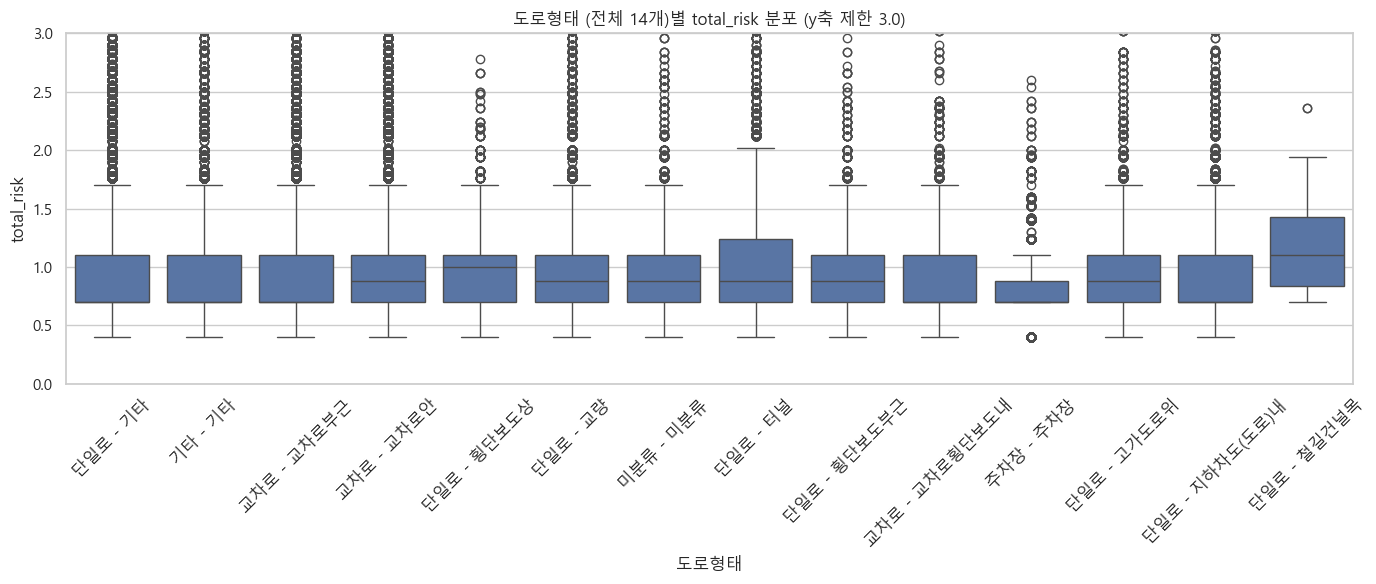

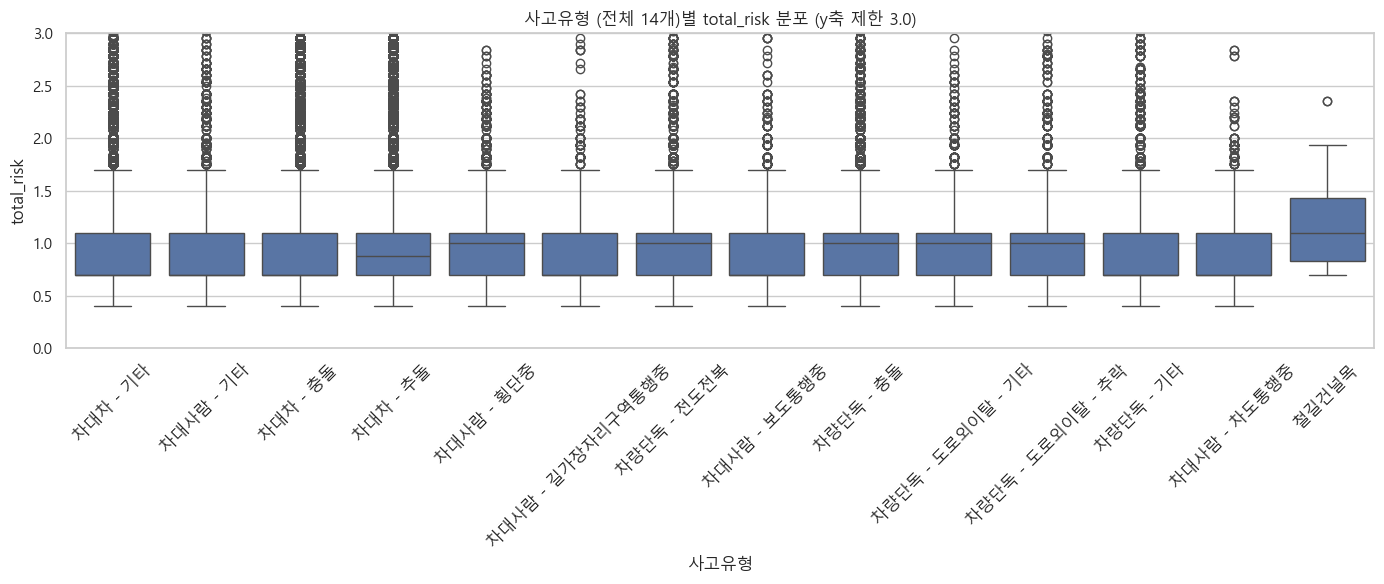

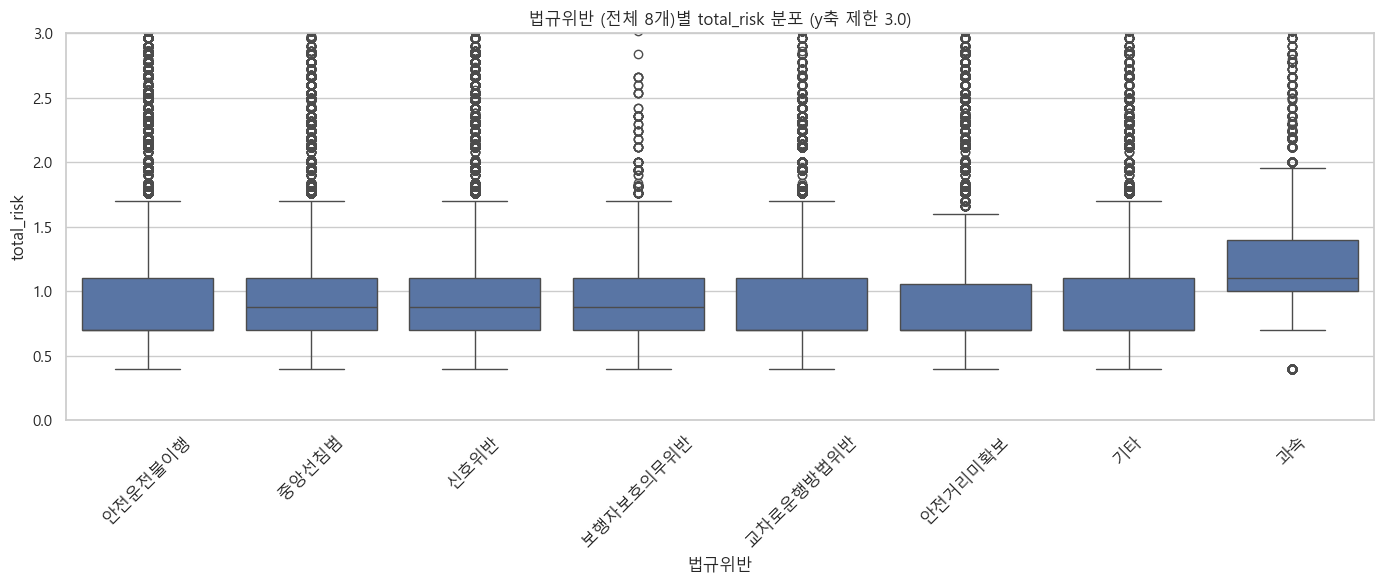

In [36]:
# %% [code]
# Î∂ÑÏÑùÌï† Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏
cat_cols = ['ÎèÑÎ°úÌòïÌÉú', 'ÏÇ¨Í≥†Ïú†Ìòï', 'Î≤ïÍ∑úÏúÑÎ∞ò']

# Î∞ïÏä§ÌîåÎ°Ø Í∑∏Î¶¨Îäî Ìï®Ïàò Ï†ïÏùò
def plot_box_by_category(col, max_y=3.0):
    # Î≤îÏ£º Ïàò Ï≤¥ÌÅ¨
    if col in df.columns:
        unique_vals = df[col].dropna().unique()
        n_cat = len(unique_vals)

        # ÏÉÅÏúÑ 25Í∞úÎßå ÎÇ®Í∏∞Í∏∞ or Ï†ÑÎ∂Ä
        if n_cat > 25:
            top_25 = df[col].value_counts().head(25).index
            df_plot = df[df[col].isin(top_25)].copy()
            title = f"{col} (ÎπàÎèÑ ÏÉÅÏúÑ 25Í∞ú)"
        else:
            df_plot = df.copy()
            title = f"{col} (Ï†ÑÏ≤¥ {n_cat}Í∞ú)"

        # Î∞ïÏä§ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
        plt.figure(figsize=(14, 6))
        sns.boxplot(data=df_plot, x=col, y='total_risk')
        plt.ylim(0, max_y)
        plt.title(f"{title}Î≥Ñ total_risk Î∂ÑÌè¨ (yÏ∂ï Ï†úÌïú {max_y})", fontproperties=font_prop)
        plt.xticks(rotation=45, fontproperties=font_prop)
        plt.tight_layout()
        plt.show()

# %% [code]
# Î™®Îì† Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ Î∞ïÏä§ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
for col in cat_cols:
    plot_box_by_category(col, max_y=3.0)


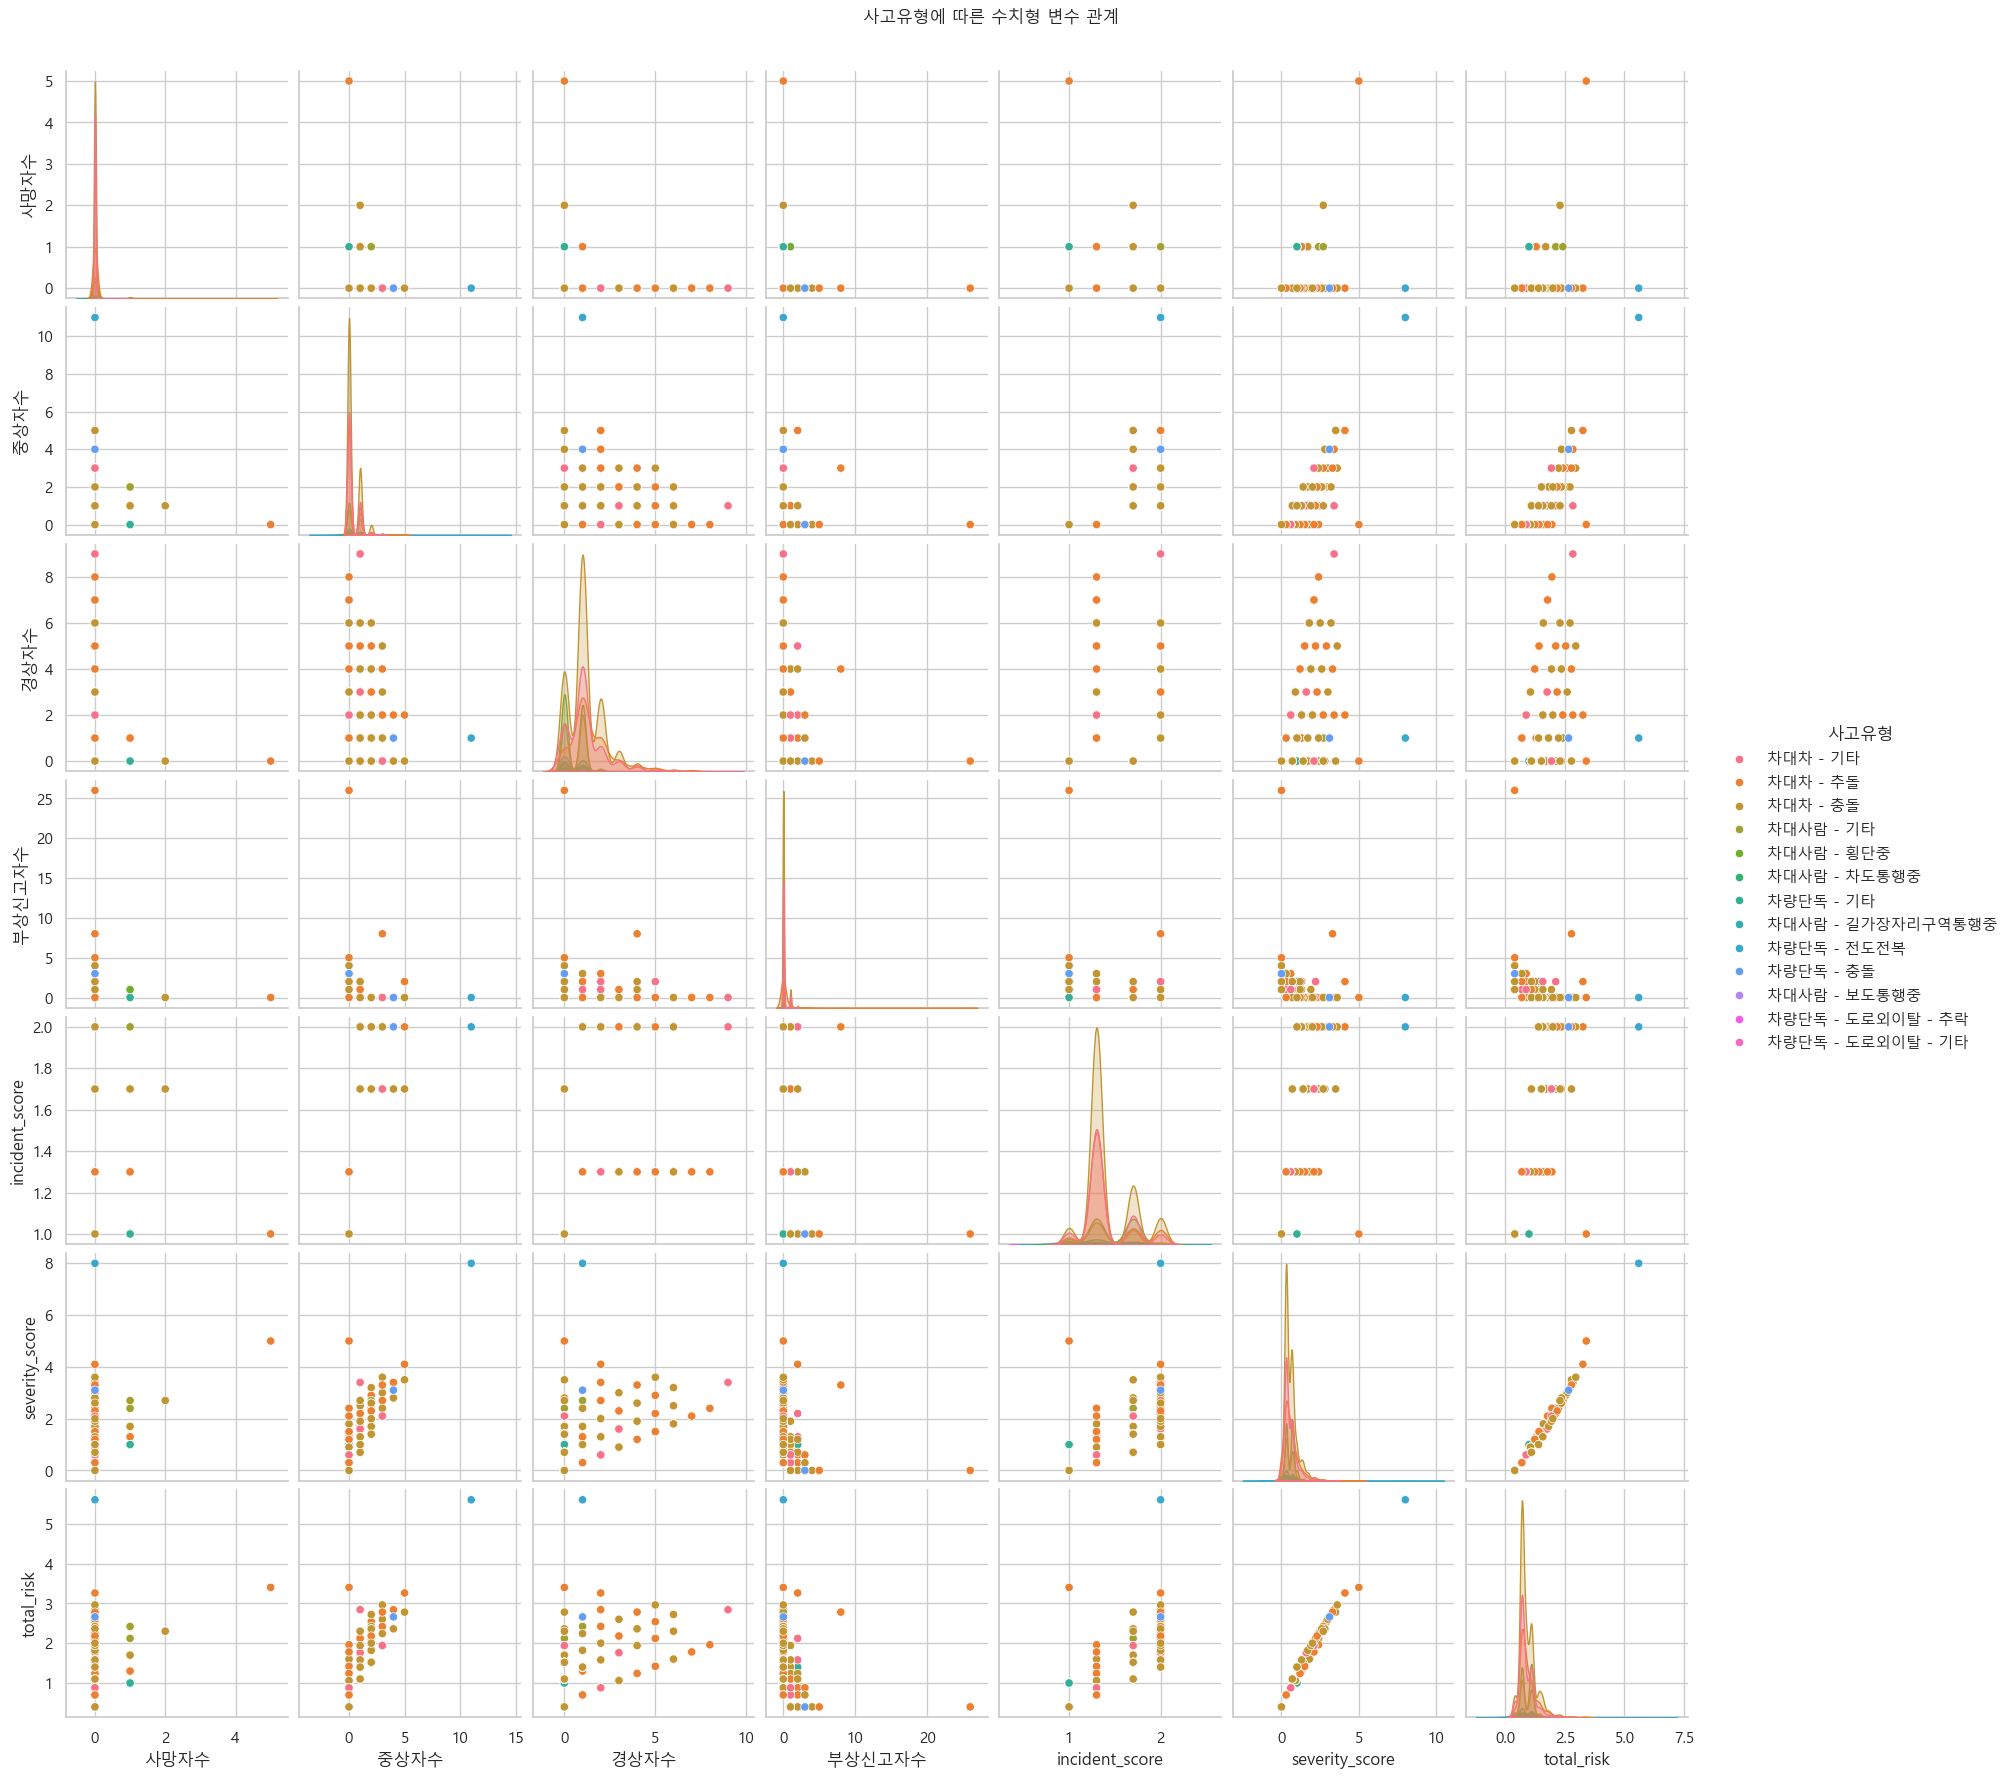

In [39]:
# %% [code]
if 'ÏÇ¨Í≥†Ïú†Ìòï' in df.columns:
    sample = df.sample(3000, random_state=0) if len(df) > 3000 else df
    sns.pairplot(sample[num_cols + ['ÏÇ¨Í≥†Ïú†Ìòï']], hue='ÏÇ¨Í≥†Ïú†Ìòï')
    plt.suptitle("ÏÇ¨Í≥†Ïú†ÌòïÏóê Îî∞Î•∏ ÏàòÏπòÌòï Î≥ÄÏàò Í¥ÄÍ≥Ñ", y=1.02, fontproperties=font_prop)
    plt.show()


In [40]:
# %% [code]
if 'ÎèÑÎ°úÌòïÌÉú' in df.columns:
    roadtype_group = df.groupby('ÎèÑÎ°úÌòïÌÉú')[num_cols].mean().round(2)
    display(roadtype_group)


ÏÇ¨ÎßùÏûêÏàò  Ï§ëÏÉÅÏûêÏàò  Í≤ΩÏÉÅÏûêÏàò  Î∂ÄÏÉÅÏã†Í≥†ÏûêÏàò  incident_score  severity_score  \
ÎèÑÎ°úÌòïÌÉú                                                                        
ÍµêÏ∞®Î°ú - ÍµêÏ∞®Î°úÎ∂ÄÍ∑º      0.01  0.28  1.15    0.09            1.40            0.56   
ÍµêÏ∞®Î°ú - ÍµêÏ∞®Î°úÏïà       0.01  0.36  1.10    0.09            1.43            0.59   
ÍµêÏ∞®Î°ú - ÍµêÏ∞®Î°úÌö°Îã®Î≥¥ÎèÑÎÇ¥   0.02  0.42  0.61    0.06            1.45            0.50   
Í∏∞ÌÉÄ - Í∏∞ÌÉÄ          0.01  0.28  1.01    0.10            1.39            0.51   
Îã®ÏùºÎ°ú - Í≥†Í∞ÄÎèÑÎ°úÏúÑ      0.03  0.30  1.33    0.09            1.40            0.63   
Îã®ÏùºÎ°ú - ÍµêÎüâ         0.04  0.36  1.32    0.12            1.42            0.69   
Îã®ÏùºÎ°ú - Í∏∞ÌÉÄ         0.02  0.33  1.06    0.10            1.41            0.57   
Îã®ÏùºÎ°ú - ÏßÄÌïòÏ∞®ÎèÑ(ÎèÑÎ°ú)ÎÇ¥  0.03  0.32  1.12    0.08            1.41            0.59   
Îã®ÏùºÎ°ú - Ï≤†Í∏∏Í±¥ÎÑêÎ™©      0.38  0.56  0.60    0.04            1.42            0.95   
Îã®ÏùºÎ°ú - ÌÑ∞ÎÑê         0.04  0.44  1.67    0.17            1.46            0.85   
Îã®ÏùºÎ°ú - Ìö°Îã®Î≥¥ÎèÑÎ∂ÄÍ∑º     0.03  0.44  0.80    0.09            1.45            0.58   
Îã®ÏùºÎ°ú - Ìö°Îã®Î≥¥ÎèÑÏÉÅ      0.03  0.51  0.50    0.06            1.48            0.54   
ÎØ∏Î∂ÑÎ•ò - ÎØ∏Î∂ÑÎ•ò        0.04  0.39  1.15    0.10            1.43            0.66   
Ï£ºÏ∞®Ïû• - Ï£ºÏ∞®Ïû•        0.00  0.21  0.97    0.08            1.37            0.44   

                 total_risk  
ÎèÑÎ°úÌòïÌÉú                         
ÍµêÏ∞®Î°ú - ÍµêÏ∞®Î°úÎ∂ÄÍ∑º            0.89  
ÍµêÏ∞®Î°ú - ÍµêÏ∞®Î°úÏïà             0.93  
ÍµêÏ∞®Î°ú - ÍµêÏ∞®Î°úÌö°Îã®Î≥¥ÎèÑÎÇ¥         0.88  
Í∏∞ÌÉÄ - Í∏∞ÌÉÄ                0.86  
Îã®ÏùºÎ°ú - Í≥†Í∞ÄÎèÑÎ°úÏúÑ            0.94  
Îã®ÏùºÎ°ú - ÍµêÎüâ               0.98  
Îã®ÏùºÎ°ú - Í∏∞ÌÉÄ               0.91  
Îã®ÏùºÎ°ú - ÏßÄÌïòÏ∞®ÎèÑ(ÎèÑÎ°ú)ÎÇ¥        0.92  
Îã®ÏùºÎ°ú - Ï≤†Í∏∏Í±¥ÎÑêÎ™©            1.14  
Îã®ÏùºÎ°ú - ÌÑ∞ÎÑê               1.09  
Îã®ÏùºÎ°ú - Ìö°Îã®Î≥¥ÎèÑÎ∂ÄÍ∑º           0.93  
Îã®ÏùºÎ°ú - Ìö°Îã®Î≥¥ÎèÑÏÉÅ            0.91  
ÎØ∏Î∂ÑÎ•ò - ÎØ∏Î∂ÑÎ•ò              0.97  
Ï£ºÏ∞®Ïû• - Ï£ºÏ∞®Ïû•              0.81

In [41]:
# %% [code]
correlation_table = df[num_cols].corr().round(2)
display(correlation_table)


ÏÇ¨ÎßùÏûêÏàò  Ï§ëÏÉÅÏûêÏàò  Í≤ΩÏÉÅÏûêÏàò  Î∂ÄÏÉÅÏã†Í≥†ÏûêÏàò  incident_score  severity_score  \
ÏÇ¨ÎßùÏûêÏàò            1.00 -0.01 -0.09   -0.02           -0.13            0.22   
Ï§ëÏÉÅÏûêÏàò           -0.01  1.00 -0.23   -0.05            0.82            0.70   
Í≤ΩÏÉÅÏûêÏàò           -0.09 -0.23  1.00   -0.04           -0.12            0.47   
Î∂ÄÏÉÅÏã†Í≥†ÏûêÏàò         -0.02 -0.05 -0.04    1.00           -0.21           -0.08   
incident_score -0.13  0.82 -0.12   -0.21            1.00            0.59   
severity_score  0.22  0.70  0.47   -0.08            0.59            1.00   
total_risk      0.15  0.80  0.35   -0.12            0.76            0.97   

                total_risk  
ÏÇ¨ÎßùÏûêÏàò                  0.15  
Ï§ëÏÉÅÏûêÏàò                  0.80  
Í≤ΩÏÉÅÏûêÏàò                  0.35  
Î∂ÄÏÉÅÏã†Í≥†ÏûêÏàò               -0.12  
incident_score        0.76  
severity_score        0.97  
total_risk            1.00

In [42]:
# %% [code]
if 'ÎèÑÎ°úÎ™Ö' in df.columns:
    top_road = df.groupby('ÎèÑÎ°úÎ™Ö')['total_risk'].sum().sort_values(ascending=False).head(10)
    print("Top 10 ÏúÑÌóò ÎèÑÎ°ú:")
    print(top_road)

if 'ÏãúÍµ∞Íµ¨' in df.columns:
    top_region = df.groupby('ÏãúÍµ∞Íµ¨')['total_risk'].sum().sort_values(ascending=False).head(10)
    print("Top 10 ÏúÑÌóò ÏãúÍµ∞Íµ¨:")
    print(top_region)


Top 10 ÏúÑÌóò ÏãúÍµ∞Íµ¨:
ÏãúÍµ∞Íµ¨
Í≤ΩÍ∏∞ÎèÑ Î∂ÄÏ≤úÏãú         45991.78
Í≤ΩÍ∏∞ÎèÑ ÌèâÌÉùÏãú         40199.86
Ï∂©Ï≤≠ÎÇ®ÎèÑ Ï≤úÏïàÏãú ÏÑúÎ∂ÅÍµ¨    40153.46
ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨       35863.10
ÎåÄÍµ¨Í¥ëÏó≠Ïãú Îã¨ÏÑúÍµ¨       34889.28
Í≤ΩÍ∏∞ÎèÑ ÌôîÏÑ±Ïãú         34886.48
Ï∂©Ï≤≠ÎÇ®ÎèÑ Ï≤úÏïàÏãú ÎèôÎÇ®Íµ¨    33587.82
Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ Ï†úÏ£ºÏãú     32651.86
Í≤ΩÍ∏∞ÎèÑ ÏÑ±ÎÇ®Ïãú Î∂ÑÎãπÍµ¨     29658.52
Í≤ΩÍ∏∞ÎèÑ ÎÇ®ÏñëÏ£ºÏãú        28185.12
Name: total_risk, dtype: float64


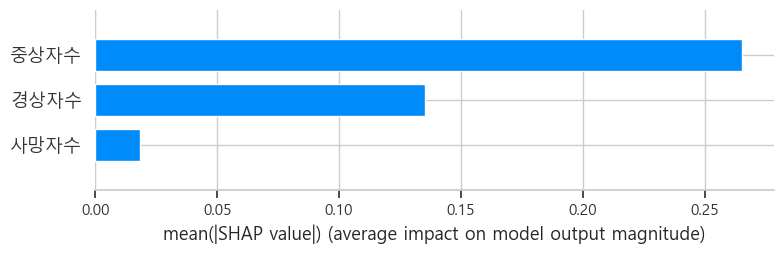

In [43]:
# %% [code]
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [44]:
# total_risk ÏÉÅÏúÑ 1% ÏÇ¨Í≥†Îì§
top1 = df[df['total_risk'] >= df['total_risk'].quantile(0.99)]

# Ïù¥ Ï§ëÏóêÏÑú ÎèÑÎ°úÌòïÌÉú, ÏÇ¨Í≥†Ïú†Ìòï Îì± Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏
for col in ['ÎèÑÎ°úÌòïÌÉú', 'ÏÇ¨Í≥†Ïú†Ìòï', 'Î≤ïÍ∑úÏúÑÎ∞ò']:
    if col in df.columns:
        print(f"[{col}] Î∂ÑÌè¨ (total_risk ÏÉÅÏúÑ 1%)")
        print(top1[col].value_counts(normalize=True).round(2))
        print()


[ÎèÑÎ°úÌòïÌÉú] Î∂ÑÌè¨ (total_risk ÏÉÅÏúÑ 1%)
ÎèÑÎ°úÌòïÌÉú
Îã®ÏùºÎ°ú - Í∏∞ÌÉÄ           0.51
ÍµêÏ∞®Î°ú - ÍµêÏ∞®Î°úÏïà         0.27
ÍµêÏ∞®Î°ú - ÍµêÏ∞®Î°úÎ∂ÄÍ∑º        0.13
Í∏∞ÌÉÄ - Í∏∞ÌÉÄ            0.03
Îã®ÏùºÎ°ú - ÌÑ∞ÎÑê           0.02
Îã®ÏùºÎ°ú - ÍµêÎüâ           0.02
Îã®ÏùºÎ°ú - ÏßÄÌïòÏ∞®ÎèÑ(ÎèÑÎ°ú)ÎÇ¥    0.01
Îã®ÏùºÎ°ú - Í≥†Í∞ÄÎèÑÎ°úÏúÑ        0.00
ÎØ∏Î∂ÑÎ•ò - ÎØ∏Î∂ÑÎ•ò          0.00
ÍµêÏ∞®Î°ú - ÍµêÏ∞®Î°úÌö°Îã®Î≥¥ÎèÑÎÇ¥     0.00
Îã®ÏùºÎ°ú - Ìö°Îã®Î≥¥ÎèÑÎ∂ÄÍ∑º       0.00
Îã®ÏùºÎ°ú - Ìö°Îã®Î≥¥ÎèÑÏÉÅ        0.00
Ï£ºÏ∞®Ïû• - Ï£ºÏ∞®Ïû•          0.00
Îã®ÏùºÎ°ú - Ï≤†Í∏∏Í±¥ÎÑêÎ™©        0.00
Name: proportion, dtype: float64

[ÏÇ¨Í≥†Ïú†Ìòï] Î∂ÑÌè¨ (total_risk ÏÉÅÏúÑ 1%)
ÏÇ¨Í≥†Ïú†Ìòï
Ï∞®ÎåÄÏ∞® - Ï∂©Îèå             0.41
Ï∞®ÎåÄÏ∞® - Ï∂îÎèå             0.36
Ï∞®ÎåÄÏ∞® - Í∏∞ÌÉÄ             0.16
Ï∞®ÎüâÎã®ÎèÖ - Ï∂©Îèå            0.03
Ï∞®ÎüâÎã®ÎèÖ - Ï†ÑÎèÑÏ†ÑÎ≥µ          0.01
Ï∞®ÎüâÎã®ÎèÖ - Í∏∞ÌÉÄ            0.01
Ï∞®ÎåÄÏÇ¨Îûå - Í∏∞ÌÉÄ            0.01
Ï∞®ÎüâÎã®ÎèÖ - ÎèÑÎ°úÏô∏Ïù¥ÌÉà - Ï∂îÎùΩ    0.00
Ï∞

In [ ]:
# ## ÌÜµÌñâÎüâ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏúºÎ©¥ Ïã§Ìñâ

# if {'ÌÜµÌñâÎüâ', 'ÏÇ¨Í≥†Í±¥Ïàò', 'ÎèÑÎ°úÎ™Ö'}.issubset(df.columns):
#     df['ÏÇ¨Í≥†Ïú®'] = df['ÏÇ¨Í≥†Í±¥Ïàò'] / df['ÌÜµÌñâÎüâ']
#     good = df[(df['ÌÜµÌñâÎüâ'] > df['ÌÜµÌñâÎüâ'].quantile(0.8)) & (df['ÏÇ¨Í≥†Ïú®'] < df['ÏÇ¨Í≥†Ïú®'].quantile(0.2))]
#     print("ÏïàÏ†Ñ Ïö∞Ïàò ÎèÑÎ°ú Top 10:")
#     print(good.groupby('ÎèÑÎ°úÎ™Ö')['ÏÇ¨Í≥†Ïú®'].mean().sort_values().head(10))


In [ ]:
# # ÏòàÏãú: 'Î∞úÏÉùÏùºÏãú'Í∞Ä ÏûàÎäî Í≤ΩÏö∞ ÏãúÍ∞Ñ Ï∂îÏ∂ú
# if 'Î∞úÏÉùÏùºÏãú' in df.columns:
#     df['ÏÇ¨Í≥†ÏãúÍ∞Ñ'] = pd.to_datetime(df['Î∞úÏÉùÏùºÏãú'], errors='coerce').dt.hour
#     plt.figure(figsize=(10, 5))
#     sns.histplot(df['ÏÇ¨Í≥†ÏãúÍ∞Ñ'], bins=24, kde=False)
#     plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏÇ¨Í≥† Î∞úÏÉù Î∂ÑÌè¨", fontproperties=font_prop)
#     plt.xlabel("ÏãúÍ∞Å", fontproperties=font_prop)
#     plt.tight_layout()
#     plt.show()


In [46]:
# SHAP Í∞í Í∏∞Ï§ÄÏúºÎ°ú Ï£ºÏöî Í∏∞Ïó¨ Î≥ÄÏàò ÏãùÎ≥Ñ
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df['dominant'] = shap_df.abs().idxmax(axis=1)
print("ÏÇ¨Í≥†Î≥Ñ SHAP Í∏∞Ïó¨ÎèÑÍ∞Ä Í∞ÄÏû• ÌÅ∞ Î≥ÄÏàò Î∂ÑÌè¨:")
print(shap_df['dominant'].value_counts())


ÏÇ¨Í≥†Î≥Ñ SHAP Í∏∞Ïó¨ÎèÑÍ∞Ä Í∞ÄÏû• ÌÅ∞ Î≥ÄÏàò Î∂ÑÌè¨:
dominant
Ï§ëÏÉÅÏûêÏàò    539804
Í≤ΩÏÉÅÏûêÏàò     77244
ÏÇ¨ÎßùÏûêÏàò     10308
Name: count, dtype: int64


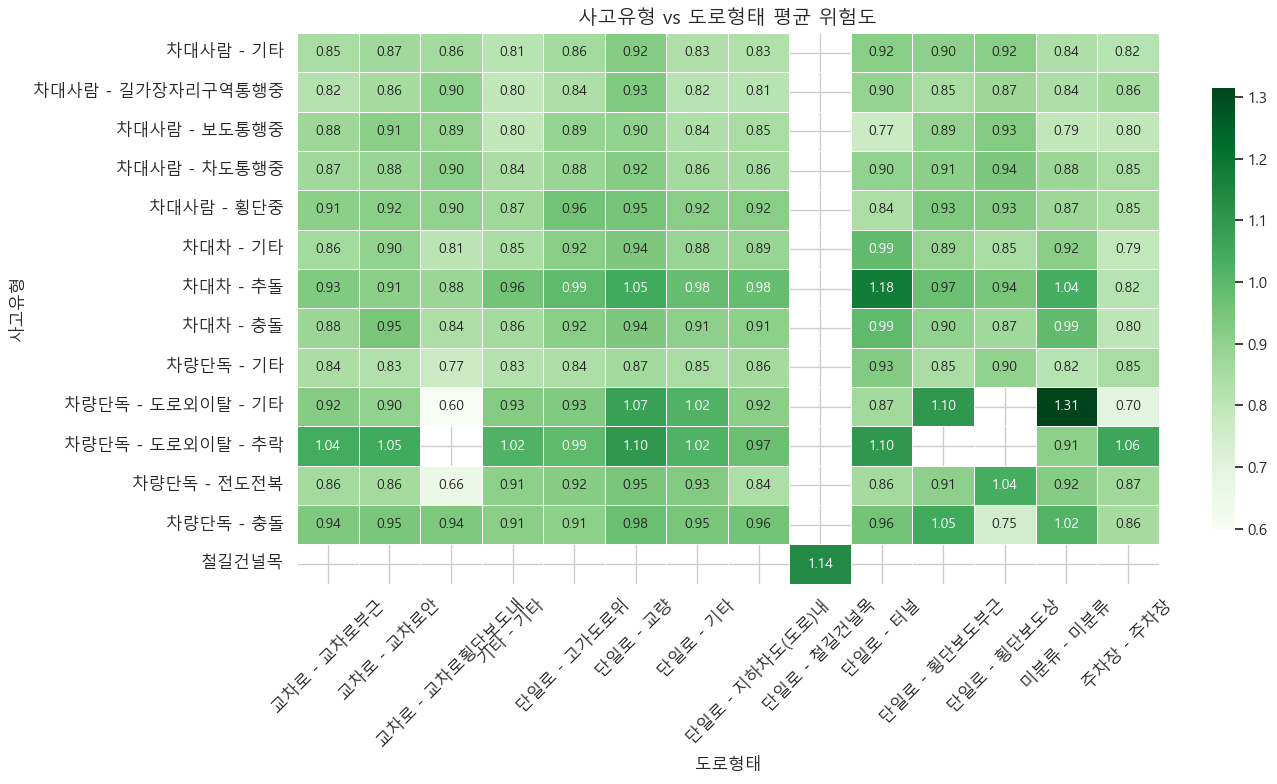

In [48]:
# %% [code]
# ÏÇ¨Í≥†Ïú†Ìòï vs ÎèÑÎ°úÌòïÌÉú ÍµêÏ∞® ÌûàÌä∏Îßµ (Greens Ïª¨Îü¨ Ï†ÅÏö©)
if {'ÏÇ¨Í≥†Ïú†Ìòï', 'ÎèÑÎ°úÌòïÌÉú'}.issubset(df.columns):
    pivot = df.pivot_table(index='ÏÇ¨Í≥†Ïú†Ìòï', columns='ÎèÑÎ°úÌòïÌÉú', values='total_risk', aggfunc='mean')
    plt.figure(figsize=(14, 8))
    sns.heatmap(
        pivot,
        annot=True,
        fmt=".2f",
        cmap='Greens',            # ÎÖπÏÉâ Í≥ÑÏó¥ (ÏïàÏ†ïÍ∞ê ÏûàÎäî ÏÉâÍ∞ê)
        linewidths=0.5,           # ÏÖÄ Í∞Ñ Í≤ΩÍ≥ÑÏÑ†
        linecolor='white',
        cbar_kws={'shrink': 0.8}, # Ïª¨Îü¨Î∞î ÌÅ¨Í∏∞ Ï°∞Ï†ï
        annot_kws={"size": 10}    # Ïà´Ïûê ÌÅ¨Í∏∞ Ï°∞Ï†à
    )
    plt.title("ÏÇ¨Í≥†Ïú†Ìòï vs ÎèÑÎ°úÌòïÌÉú ÌèâÍ∑† ÏúÑÌóòÎèÑ", fontproperties=font_prop, fontsize=14)
    plt.xticks(fontproperties=font_prop, rotation=45)
    plt.yticks(fontproperties=font_prop)
    plt.tight_layout()
    plt.show()


In [49]:
# %% [code]
if {'ÏÇ¨Í≥†Ïú†Ìòï', 'ÎèÑÎ°úÌòïÌÉú'}.issubset(df.columns):
    pivot = df.pivot_table(index='ÏÇ¨Í≥†Ïú†Ìòï', columns='ÎèÑÎ°úÌòïÌÉú', values='total_risk', aggfunc='mean')

    # ÌîºÎ≤ó ÌÖåÏù¥Î∏îÏùÑ longÌòïÏúºÎ°ú Î≥ÄÌôò
    pivot_melted = pivot.reset_index().melt(id_vars='ÏÇ¨Í≥†Ïú†Ìòï', var_name='ÎèÑÎ°úÌòïÌÉú', value_name='ÌèâÍ∑†ÏúÑÌóòÎèÑ')

    # ÏúÑÌóòÎèÑ ÏÉÅÏúÑ 10Í∞ú Ï°∞Ìï© Ï∂îÏ∂ú
    top10 = pivot_melted.sort_values('ÌèâÍ∑†ÏúÑÌóòÎèÑ', ascending=False).head(10)
    print("üö® Ï†ïÏ±Ö ÌÉÄÍ≤ü Ïö∞ÏÑ†ÏàúÏúÑ (ÏÇ¨Í≥†Ïú†Ìòï vs ÎèÑÎ°úÌòïÌÉú ÏúÑÌóòÎèÑ ÏÉÅÏúÑ 10)")
    print(top10)


üö® Ï†ïÏ±Ö ÌÉÄÍ≤ü Ïö∞ÏÑ†ÏàúÏúÑ (ÏÇ¨Í≥†Ïú†Ìòï vs ÎèÑÎ°úÌòïÌÉú ÏúÑÌóòÎèÑ ÏÉÅÏúÑ 10)
                  ÏÇ¨Í≥†Ïú†Ìòï          ÎèÑÎ°úÌòïÌÉú     ÌèâÍ∑†ÏúÑÌóòÎèÑ
177  Ï∞®ÎüâÎã®ÎèÖ - ÎèÑÎ°úÏô∏Ïù¥ÌÉà - Í∏∞ÌÉÄ     ÎØ∏Î∂ÑÎ•ò - ÎØ∏Î∂ÑÎ•ò  1.315000
132           Ï∞®ÎåÄÏ∞® - Ï∂îÎèå      Îã®ÏùºÎ°ú - ÌÑ∞ÎÑê  1.178476
125              Ï≤†Í∏∏Í±¥ÎÑêÎ™©   Îã®ÏùºÎ°ú - Ï≤†Í∏∏Í±¥ÎÑêÎ™©  1.137500
80   Ï∞®ÎüâÎã®ÎèÖ - ÎèÑÎ°úÏô∏Ïù¥ÌÉà - Ï∂îÎùΩ      Îã®ÏùºÎ°ú - ÍµêÎüâ  1.101404
149  Ï∞®ÎüâÎã®ÎèÖ - ÎèÑÎ°úÏô∏Ïù¥ÌÉà - Í∏∞ÌÉÄ  Îã®ÏùºÎ°ú - Ìö°Îã®Î≥¥ÎèÑÎ∂ÄÍ∑º  1.100000
136  Ï∞®ÎüâÎã®ÎèÖ - ÎèÑÎ°úÏô∏Ïù¥ÌÉà - Ï∂îÎùΩ      Îã®ÏùºÎ°ú - ÌÑ∞ÎÑê  1.100000
79   Ï∞®ÎüâÎã®ÎèÖ - ÎèÑÎ°úÏô∏Ïù¥ÌÉà - Í∏∞ÌÉÄ      Îã®ÏùºÎ°ú - ÍµêÎüâ  1.073333
192  Ï∞®ÎüâÎã®ÎèÖ - ÎèÑÎ°úÏô∏Ïù¥ÌÉà - Ï∂îÎùΩ     Ï£ºÏ∞®Ïû• - Ï£ºÏ∞®Ïû•  1.059149
152          Ï∞®ÎüâÎã®ÎèÖ - Ï∂©Îèå  Îã®ÏùºÎ°ú - Ìö°Îã®Î≥¥ÎèÑÎ∂ÄÍ∑º  1.052245
24   Ï∞®ÎüâÎã®ÎèÖ - ÎèÑÎ°úÏô∏Ïù¥ÌÉà - Ï∂îÎùΩ    ÍµêÏ∞®Î°ú - ÍµêÏ∞®Î°úÏïà  1.052020


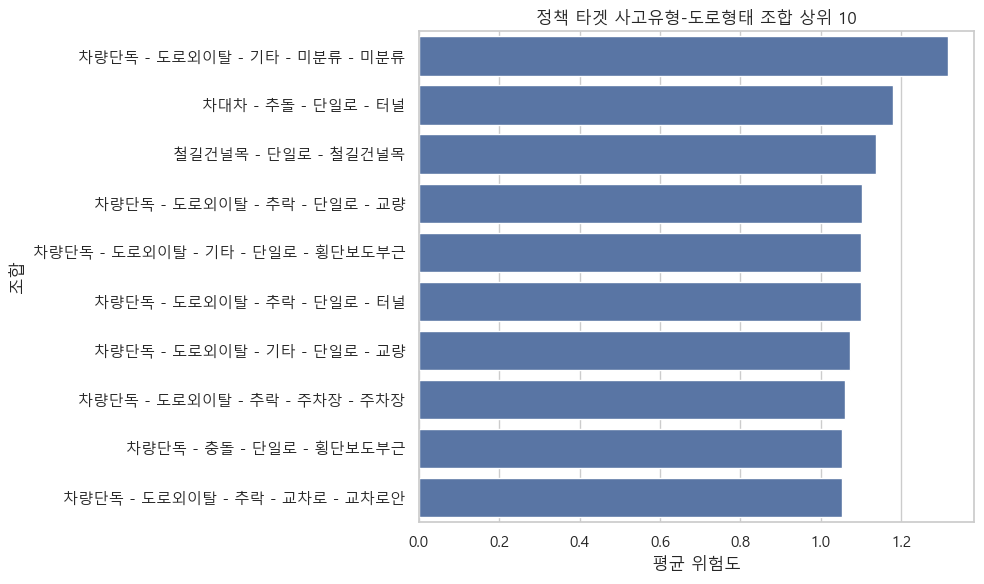

In [50]:
# %% [code]
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='ÌèâÍ∑†ÏúÑÌóòÎèÑ', y=top10['ÏÇ¨Í≥†Ïú†Ìòï'] + " - " + top10['ÎèÑÎ°úÌòïÌÉú'])
plt.title("Ï†ïÏ±Ö ÌÉÄÍ≤ü ÏÇ¨Í≥†Ïú†Ìòï-ÎèÑÎ°úÌòïÌÉú Ï°∞Ìï© ÏÉÅÏúÑ 10", fontproperties=font_prop)
plt.xlabel("ÌèâÍ∑† ÏúÑÌóòÎèÑ", fontproperties=font_prop)
plt.ylabel("Ï°∞Ìï©", fontproperties=font_prop)
plt.tight_layout()
plt.show()


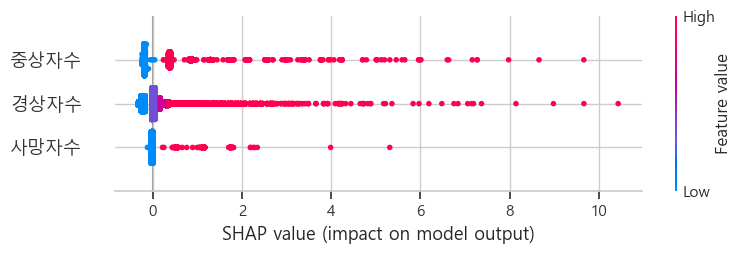

In [51]:
# %% [code]
# SHAP: Î®∏Ïã†Îü¨Îãù Î™®Îç∏ Í∏∞Î∞ò Î≥ÄÏàò Ï§ëÏöîÎèÑ Ìï¥ÏÑù
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Ïª¨Îüº Ï°¥Ïû¨ Ïãú Ïã§Ìñâ
feature_cols = ['ÏÇ¨ÎßùÏûêÏàò', 'Ï§ëÏÉÅÏûêÏàò', 'Í≤ΩÏÉÅÏûêÏàò']
target_col = 'total_risk'

if set(feature_cols + [target_col]).issubset(df.columns):
    df_shap = df[feature_cols + [target_col]].dropna()

    # Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
    X = df_shap[feature_cols]
    y = df_shap[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Î™®Îç∏ ÌïôÏäµ
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # SHAP Í∞í Í≥ÑÏÇ∞
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)

    # ÏöîÏïΩ Í∑∏ÎûòÌîÑ Ï∂úÎ†•
    shap.summary_plot(shap_values, X_test)


In [52]:
# %% [code]
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split

# ÌîºÏ≥ê Î∞è ÌÉÄÍ≤ü ÏßÄÏ†ï
feature_cols = ['ÏÇ¨ÎßùÏûêÏàò', 'Ï§ëÏÉÅÏûêÏàò', 'Í≤ΩÏÉÅÏûêÏàò']
target_col = 'total_risk'

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df_shap = df[feature_cols + [target_col]].dropna()
X = df_shap[feature_cols]
y = df_shap[target_col]

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Î™®Îç∏ ÌïôÏäµ
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# SHAP Í∞í Í≥ÑÏÇ∞
explainer = shap.Explainer(model)
shap_values = explainer(X_test)


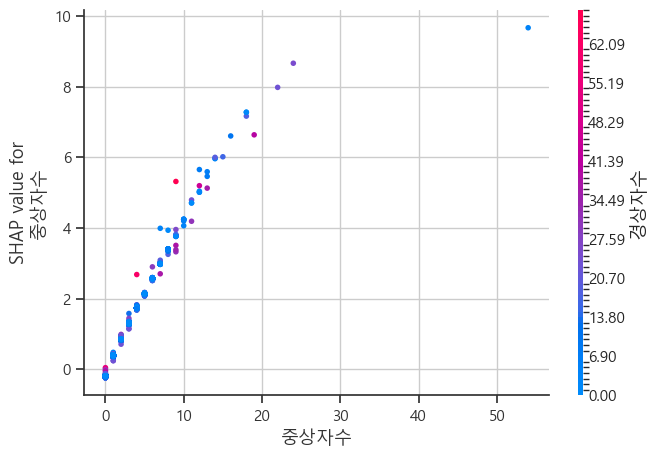

In [53]:
# %% [code]
# SHAP dependence plot - ÌïòÎÇòÏùò Î≥ÄÏàòÏóê ÎåÄÌï¥ Ìï¥ÏÑù
shap.dependence_plot("Ï§ëÏÉÅÏûêÏàò", shap_values.values, X_test, interaction_index="Í≤ΩÏÉÅÏûêÏàò")


In [54]:
# %% [code]
# Force plotÏö© JS ÏãúÍ∞ÅÌôî Ï¥àÍ∏∞Ìôî
shap.initjs()

# ÌÖåÏä§Ìä∏ÏÖã Ï§ë Ï≤´ Î≤àÏß∏ ÏÉòÌîåÏóê ÎåÄÌïú Force Plot
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0])


In [55]:
# %% [code]
# Force plot Ïó¨Îü¨ Í∞ú Ï†ÄÏû• (5Í∞ú ÏÉòÌîå)
for i in range(5):
    shap.save_html(f"force_plot_{i}.html", shap.force_plot(
        explainer.expected_value, shap_values.values[i], X_test.iloc[i]))


In [56]:
# %% [code]
# interaction values Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú TreeExplainer ÏÇ¨Ïö©
tree_explainer = shap.TreeExplainer(model)

# ÏÉÅÌò∏ÏûëÏö©Í∞í Í≥ÑÏÇ∞ (ÏãúÍ∞Ñ Ï¢Ä Í±∏Î¶º)
interaction_values = tree_explainer.shap_interaction_values(X_test)


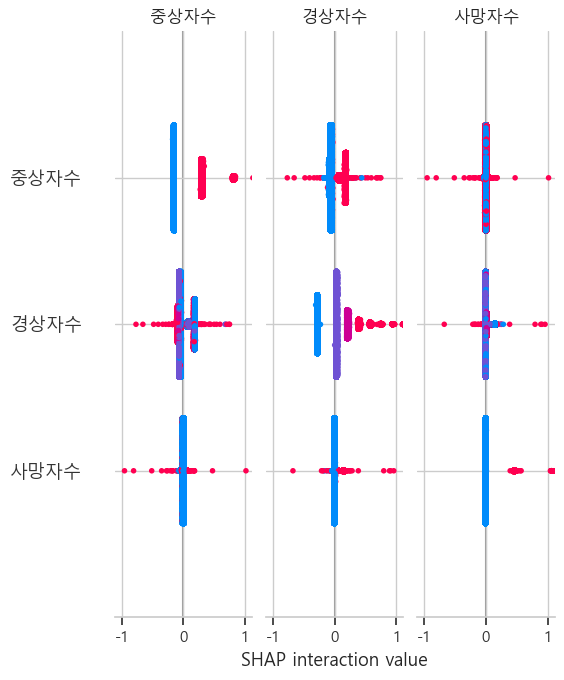

In [58]:
# %% [code]
# Summary plot with interaction values
shap.summary_plot(interaction_values, X_test)


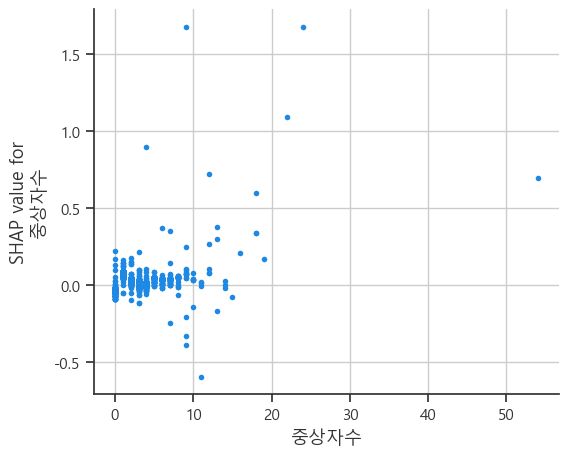

In [ ]:
## Ï∂îÌõÑ Î∞∞Ïó¥ Í∏∏Ïù¥ ÎßûÏßÄ ÏïäÎäî Î¨∏Ï†ú Ìï¥Í≤∞ ÌïÑÏöî
## Îç∞Ïù¥ÌÑ∞ ÏÖã ÌôïÏù∏ ÌõÑ Ï∂îÍ∞Ä ÏûëÏóÖ ÌïÑÏöîÌï† Ïàò ÏûàÏùå

# %% [code]
# 'Ï§ëÏÉÅÏûêÏàò'Ïùò Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
var = "Ï§ëÏÉÅÏûêÏàò"
interact_with = "Í≤ΩÏÉÅÏûêÏàò"

var_index = list(X_test.columns).index(var)
interact_index = list(X_test.columns).index(interact_with)

# dependence plot: Ï§ëÏÉÅÏûêÏàò Í∏∞Ï§Ä, Í≤ΩÏÉÅÏûêÏàòÏôÄÏùò ÏÉÅÌò∏ÏûëÏö© Í∞ïÏ°∞
shap.dependence_plot(
    var_index, 
    interaction_values[:, :, interact_index],  # ÏÉÅÌò∏ÏûëÏö© ÎåÄÏÉÅ Í∏∞Ï§Ä Ïä¨ÎùºÏù¥Ïã±
    X_test, 
    feature_names=X_test.columns,
    interaction_index=None  # Ïù¥ÎØ∏ interaction Í∞í ÎÑ£ÏóàÏúºÎØÄÎ°ú None
)
